In [75]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('s3://data-files-http/customer_data.csv')

In [77]:
# 1. How many rows and columns are there?
print(df.shape)

(99933, 17)


In [78]:
# 2. What are the column names?
print(df.columns)

Index(['UCID', ' GENDER', ' AGE_GROUP2', ' MEMBERSHIP_DATE',
       ' BRAND_REPORTING', ' LOCATION_NAME_REPORTING', ' STORE_COUNTRY',
       ' BUSINESS_CHANNEL', ' INVOICE_NO', '  NET_SALES_AMOUNT ', ' SALES_QTY',
       '  DISCOUNT_AMOUNT ', ' DAY_DT', ' DIV_NAME', ' DEPT_NAME',
       ' CLASS_NAME', ' SUBCLASS_NAME'],
      dtype='object')


In [79]:
# remove columns name spaces
df.columns = df.columns.str.strip()

In [80]:
# check null values
df.isnull().sum()

UCID                          0
GENDER                        0
AGE_GROUP2                    0
MEMBERSHIP_DATE            2327
BRAND_REPORTING               0
LOCATION_NAME_REPORTING       0
STORE_COUNTRY                 0
BUSINESS_CHANNEL              0
INVOICE_NO                    0
NET_SALES_AMOUNT              0
SALES_QTY                     0
DISCOUNT_AMOUNT               0
DAY_DT                        0
DIV_NAME                      5
DEPT_NAME                     5
CLASS_NAME                    5
SUBCLASS_NAME                 5
dtype: int64

In [81]:
# drop na values
df.dropna(inplace=True)

In [82]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [83]:
# shape after cleaning
df.shape

(87004, 17)

In [50]:
# 3. What are the data types of each column?
print(df.dtypes)


UCID                         int64
GENDER                      object
AGE_GROUP2                  object
MEMBERSHIP_DATE             object
BRAND_REPORTING             object
LOCATION_NAME_REPORTING     object
STORE_COUNTRY               object
BUSINESS_CHANNEL            object
INVOICE_NO                 float64
NET_SALES_AMOUNT            object
SALES_QTY                  float64
DISCOUNT_AMOUNT             object
DAY_DT                      object
DIV_NAME                    object
DEPT_NAME                   object
CLASS_NAME                  object
SUBCLASS_NAME               object
dtype: object


In [51]:
# dataframe head()
df.head()

,UCID,GENDER,AGE_GROUP2,MEMBERSHIP_DATE,BRAND_REPORTING,LOCATION_NAME_REPORTING,STORE_COUNTRY,BUSINESS_CHANNEL,INVOICE_NO,NET_SALES_AMOUNT,SALES_QTY,DISCOUNT_AMOUNT,DAY_DT,DIV_NAME,DEPT_NAME,CLASS_NAME,SUBCLASS_NAME
0,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,$331.10,1.0,$-,2022-03-18,"Home, Tech & Equipment",Travel Equipment,Travel Accessories,Snuggle Me
1,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,$16.17,1.0,$-,2022-03-18,Fashion,Accessories,Kids & Baby Accessories,Accessories Sets
2,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,$75.75,1.0,$-,2022-03-18,Fashion,Clothing,Rompers,Rompers
3,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,$50.22,1.0,$19.58,2022-03-18,Fashion,Accessories,Kids & Baby Accessories,Bibs
4,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,$122.99,1.0,$53.35,2022-03-18,"Home, Tech & Equipment",Textiles & Interiors,Bedding,Blankets


In [52]:
df['NET_SALES_AMOUNT']=df['NET_SALES_AMOUNT'].str.replace('$','').str.replace('-','0').str.replace(',','').str.replace('(','-').str.replace(')','').astype(float)

In [53]:
df['DISCOUNT_AMOUNT']=df['DISCOUNT_AMOUNT'].str.replace('$','').str.replace('-','0').str.replace(',','').str.replace('(','-').str.replace(')','').astype(float)

In [54]:
# group by net_sales_amount by gender
df.groupby('AGE_GROUP2')['NET_SALES_AMOUNT'].sum()

AGE_GROUP2
0-14             210421.67
15-19             38945.41
20-24            327218.35
25-34           9928820.42
35-44          31097018.02
45-54          25604973.76
55+            14065311.24
UnSpecified     6172050.85
Name: NET_SALES_AMOUNT, dtype: float64

<Axes: xlabel='AGE_GROUP2'>

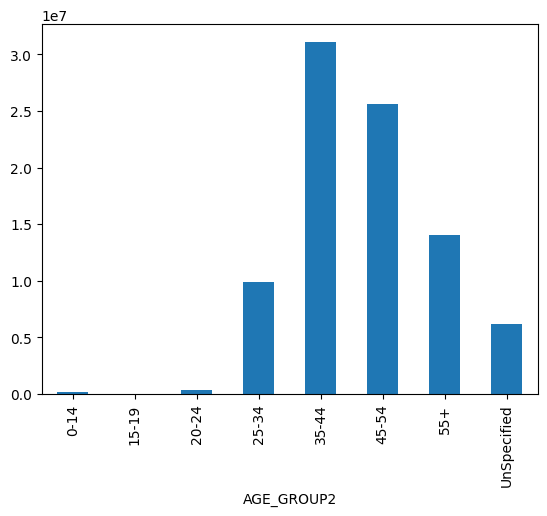

In [55]:
df.groupby('AGE_GROUP2')['NET_SALES_AMOUNT'].sum().plot(kind='bar')

<Axes: xlabel='DIV_NAME'>

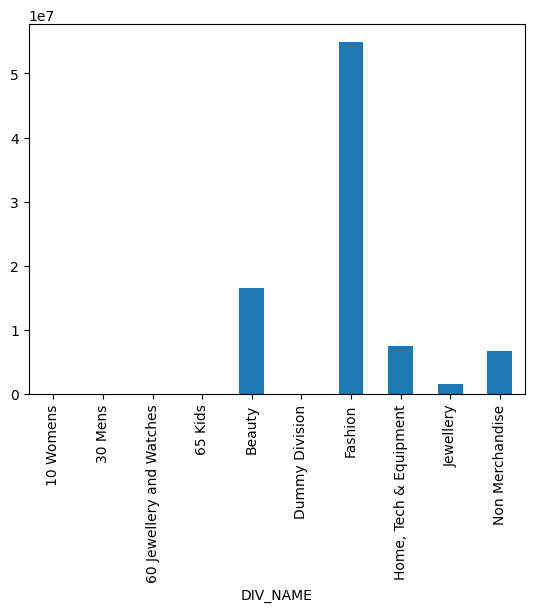

In [57]:
df.groupby('DIV_NAME')['NET_SALES_AMOUNT'].sum().plot(kind='bar')

In [58]:
df.head(1)

,UCID,GENDER,AGE_GROUP2,MEMBERSHIP_DATE,BRAND_REPORTING,LOCATION_NAME_REPORTING,STORE_COUNTRY,BUSINESS_CHANNEL,INVOICE_NO,NET_SALES_AMOUNT,SALES_QTY,DISCOUNT_AMOUNT,DAY_DT,DIV_NAME,DEPT_NAME,CLASS_NAME,SUBCLASS_NAME
0,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,331.1,1.0,0.0,2022-03-18,"Home, Tech & Equipment",Travel Equipment,Travel Accessories,Snuggle Me


<Axes: xlabel='STORE_COUNTRY'>

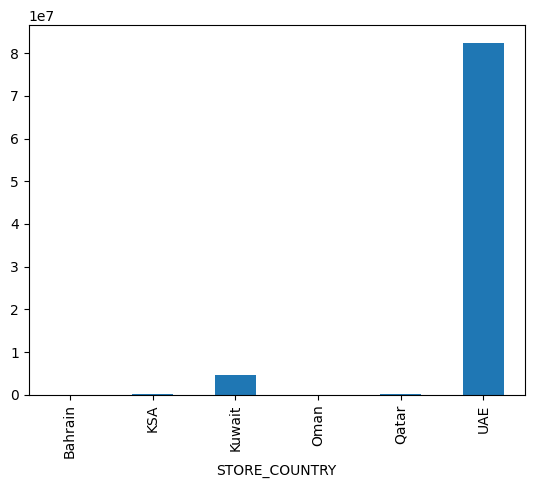

In [59]:
df.groupby('STORE_COUNTRY')['NET_SALES_AMOUNT'].sum().plot(kind='bar')

In [67]:
df[df['SALES_QTY']>3]

,UCID,GENDER,AGE_GROUP2,MEMBERSHIP_DATE,BRAND_REPORTING,LOCATION_NAME_REPORTING,STORE_COUNTRY,BUSINESS_CHANNEL,INVOICE_NO,NET_SALES_AMOUNT,SALES_QTY,DISCOUNT_AMOUNT,DAY_DT,DIV_NAME,DEPT_NAME,CLASS_NAME,SUBCLASS_NAME
1388,1000049632,UnSpecified,35-44,2022-01-11,Brand 3,"Brand 3-Al Wahda Mall, Abu Dhabi",UAE,Offline,7.265000e+18,72.38,4.0,0.00,2022-01-11,Fashion,Accessories,Kids & Baby Accessories,Bibs
2205,1000000077,Female,UnSpecified,2016-11-08,Brand 3,"Brand 3-Al Wahda Mall, Abu Dhabi",UAE,Offline,7.265000e+18,396.19,4.0,180.00,2022-11-29,"Home, Tech & Equipment",Home Accessories,Soft Accessories,Muslin Squares
2209,1000000077,Female,UnSpecified,2016-11-08,Brand 3,"Brand 3-Al Wahda Mall, Abu Dhabi",UAE,Offline,7.265000e+18,295.24,5.0,135.00,2022-11-29,"Home, Tech & Equipment",Gifting,Christmas,Hampers
2264,1000071746,Male,45-54,2009-04-13,Brand 3,"Brand 3-Al Wahda Mall, Abu Dhabi",UAE,Offline,7.265000e+18,186.67,7.0,133.00,2022-11-25,"Home, Tech & Equipment",Home Equipment,"Bath Time, Changing & Feeding",Weaning
2461,1000002832,Female,35-44,2022-04-09,Brand 3,"Brand 3-Al Wahda Mall, Abu Dhabi",UAE,Offline,7.265000e+18,417.52,4.0,77.60,2022-04-09,Fashion,Clothing,Bodysuits,Bodysuits - 5 Pk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98798,1000244225,Female,UnSpecified,2020-11-30,Brand 2,"Brand 2-Virtual Store, Dubai",UAE,Online,7.715690e+15,250.05,5.0,132.45,2022-11-11,Fashion,Clothing,Underwear,Boxers
99273,1000176234,Female,UnSpecified,2020-08-25,Brand 2,"Brand 2-Virtual Store, Dubai",UAE,Online,7.715310e+15,167.62,4.0,60.00,2022-05-08,Fashion,Clothing,T Shirts,Short Sleeve
99274,1000176234,Female,UnSpecified,2020-08-25,Brand 2,"Brand 2-Virtual Store, Dubai",UAE,Online,7.715310e+15,167.62,4.0,60.00,2022-05-08,Fashion,Clothing,T Shirts,Short Sleeve
99291,1000176234,Female,UnSpecified,2020-08-25,Brand 2,"Brand 2-Virtual Store, Dubai",UAE,Online,7.715310e+15,167.62,4.0,60.00,2022-05-08,Fashion,Clothing,T Shirts,Short Sleeve


Bad pipe message: %s [b">g\xaa\xde\xbb&s\xff\xc6\x89:\xcf\xb4X\xbe\x07\xe9V\x00\x00\xf4\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x00\xa3\x00\xa1\x00\x9f\x00k\x00j\x00i\x00h\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00\xa7\x00m\x00:\x00\x89\xc02\xc0.\xc0*\xc0&\xc0\x0f\xc0\x05\x00\x9d\x00=\x005\x00\x84\xc0/\xc0+\xc0'\xc0#\xc0\x13\xc0\t\x00\xa4\x00\xa2\x00\xa0\x00\x9e\x00g\x00@\x00?\x00>\x003\x002\x001\x000\x00\x9a\x00\x99\x00\x98\x00\x97\x00E\x00D\x00C\x00B\xc0\x18\x00\xa6\x00l\x004\x00\x9b\x00F\xc01\xc0-\xc0)\xc0%\xc0\x0e\xc0\x04\x00\x9c\x00<\x00/\x00\x96\x00A\x00\x07\xc0\x11\xc0\x07\xc0\x16\x00\x18\xc0\x0c\xc0\x02\x00\x05\x00\x04\xc0\x12\xc0\x08\x00\x16\x00\x13\x00\x10\x00\r\xc0\x17\x00\x1b\xc0\r\xc0\x03\x00\n\x00\x15\x00\x12\x00\x0f\x00\x0c\x00\x1a\x00\t\x00\x14\x00\x11\x00\x19\x00\x08\x00\x06\x00\x17\x00\x03\xc0\x10\xc0\x06\xc0"]
Bad pipe message: %s [b"\x18\x87N]1\x93M\xc9\xba\x19\xba\xb6\xa5C\x81\\\x00\xdf\x00\x00\x86\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x0

In [68]:
df['DAY_DT'].unique()

array(['2022-03-18', '2022-03-02', '2022-06-15', '2022-10-23',
       '2022-09-08', '2022-12-31', '2022-10-27', '2022-04-09',
       '2022-03-01', '2022-02-24', '2022-02-11', '2022-01-27',
       '2022-01-26', '2022-01-25', '2022-01-24', '2022-01-23',
       '2022-01-22', '2022-01-20', '2022-01-15', '2022-01-14',
       '2022-01-11', '2022-01-10', '2022-01-09', '2022-01-07',
       '2022-01-06', '2022-01-05', '2022-01-02', '2022-02-07',
       '2022-07-23', '2022-07-22', '2022-07-21', '2022-07-19',
       '2022-07-16', '2022-07-12', '2022-07-11', '2022-07-10',
       '2022-05-20', '2022-05-19', '2022-05-16', '2022-05-14',
       '2022-05-13', '2022-05-12', '2022-05-09', '2022-05-07',
       '2022-05-05', '2022-05-03', '2022-05-02', '2022-05-01',
       '2022-04-30', '2022-04-29', '2022-07-08', '2022-07-07',
       '2022-07-06', '2022-07-05', '2022-07-04', '2022-07-03',
       '2022-07-02', '2022-07-01', '2022-06-30', '2022-06-29',
       '2022-06-28', '2022-06-27', '2022-06-26', '2022-

In [74]:
df[(df['DAY_DT']=='2022-02-21') & (df['STORE_COUNTRY']=='UAE')]

,UCID,GENDER,AGE_GROUP2,MEMBERSHIP_DATE,BRAND_REPORTING,LOCATION_NAME_REPORTING,STORE_COUNTRY,BUSINESS_CHANNEL,INVOICE_NO,NET_SALES_AMOUNT,SALES_QTY,DISCOUNT_AMOUNT,DAY_DT,DIV_NAME,DEPT_NAME,CLASS_NAME,SUBCLASS_NAME
10359,1000008702,Female,35-44,2011-06-12,Brand 2,"Brand 2-Mall of the Emirates, Dubai",UAE,Offline,7.138000e+18,47.14,1.0,9.5,2022-02-21,Fashion,Clothing,T Shirts,Short Sleeve
10360,1000008702,Female,35-44,2011-06-12,Brand 2,"Brand 2-Mall of the Emirates, Dubai",UAE,Offline,7.138000e+18,103.81,1.0,0.0,2022-02-21,Fashion,Clothing,Underwear,Underwear
10361,1000027140,Male,35-44,2021-02-17,Brand 2,"Brand 2-Mall of the Emirates, Dubai",UAE,Offline,7.138000e+18,161.05,1.0,29.9,2022-02-21,Fashion,Clothing,Trousers,Sweatpants
10362,1000008702,Female,35-44,2011-06-12,Brand 2,"Brand 2-Mall of the Emirates, Dubai",UAE,Offline,7.138000e+18,112.38,2.0,0.0,2022-02-21,Fashion,Clothing,T Shirts,Short Sleeve
10363,1000008702,Female,35-44,2011-06-12,Brand 2,"Brand 2-Mall of the Emirates, Dubai",UAE,Offline,7.138000e+18,122.86,1.0,0.0,2022-02-21,Fashion,Clothing,Trousers,Sweatpants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86275,1000010550,Female,35-44,2007-06-12,Brand 4,"Brand 4-Mall of the Emirates, Dubai",UAE,Offline,4.020050e+18,147.62,1.0,0.0,2022-02-21,Beauty,Skincare,Cleansers And Exfoliators,Cleansing Balm And Oil
86276,1000010550,Female,35-44,2007-06-12,Brand 4,"Brand 4-Mall of the Emirates, Dubai",UAE,Offline,4.020040e+18,210.48,1.0,0.0,2022-02-21,Beauty,Makeup,Face,Blush
86277,1000010550,Female,35-44,2007-06-12,Brand 4,"Brand 4-Mall of the Emirates, Dubai",UAE,Offline,4.020020e+18,4666.67,1.0,0.0,2022-02-21,Fashion,Clothing,Denim,Denim
86278,1000172732,UnSpecified,45-54,2021-10-21,Brand 4,"Brand 4-Mall of the Emirates, Dubai",UAE,Offline,4.020000e+18,727.71,1.0,134.9,2022-02-21,Beauty,Skincare,"Creams, Moisturisers And Serums",Eye Cream
